## Work
1. 請將 Epoch 加到 500 個，並觀察 learning curve 的走勢
2. 請將 Optimizer 換成 SGD，並觀察 learning curve 的走勢

In [2]:
import os
import keras

# 本作業可以不需使用 GPU, 將 GPU 設定為 "無" (若有 GPU 且想開啟，可設為 "0")
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

In [3]:
# 從 Keras 的內建功能中，取得 train 與 test 資料集
train, test = keras.datasets.cifar10.load_data()

In [4]:
# 將 X 與 Y 獨立放進變數
x_train, y_train = train
x_test, y_test = test
# 資料前處理 - 標準化
x_train = x_train / 255.
x_test = x_test / 255.

# 將資料從圖形 (RGB) 轉為向量 (Single Vector)
x_train = x_train.reshape((len(x_train), -1))
x_test = x_test.reshape((len(x_test), -1))

# 將目標轉為 one-hot encoding
y_train = keras.utils.to_categorical(y_train, num_classes=10)
y_test = keras.utils.to_categorical(y_test, num_classes=10)

In [6]:
def build_mlp():
    input_layer = keras.layers.Input([x_train.shape[-1]])
    x = keras.layers.Dense(units=512, activation="relu")(input_layer)
    x = keras.layers.Dense(units=256, activation="relu")(x)
    x = keras.layers.Dense(units=128, activation="relu")(x)
    out = keras.layers.Dense(units=10, activation="softmax")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])

    return model
model = build_mlp()

W0713 23:14:03.296953   492 deprecation_wrapper.py:119] From C:\Users\USER\Anaconda3\envs\tensorflow\lib\site-packages\keras\backend\tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0713 23:14:03.446361   492 deprecation_wrapper.py:119] From C:\Users\USER\Anaconda3\envs\tensorflow\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0713 23:14:03.506648   492 deprecation_wrapper.py:119] From C:\Users\USER\Anaconda3\envs\tensorflow\lib\site-packages\keras\backend\tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.



In [7]:
"""
Compile 模型
"""
model = build_mlp()
# 用 Keras 內建方法檢視模型各層參數量
model.summary()

optimizer = keras.optimizers.Adam(lr=0.001)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer='sgd')

W0713 23:14:06.263500   492 deprecation_wrapper.py:119] From C:\Users\USER\Anaconda3\envs\tensorflow\lib\site-packages\keras\optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0713 23:14:06.282448   492 deprecation_wrapper.py:119] From C:\Users\USER\Anaconda3\envs\tensorflow\lib\site-packages\keras\backend\tensorflow_backend.py:3295: The name tf.log is deprecated. Please use tf.math.log instead.



_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
dense_5 (Dense)              (None, 512)               1573376   
_________________________________________________________________
dense_6 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_7 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_8 (Dense)              (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________


In [8]:
"""
設定要訓練的 Epoch 數
"""
model.fit(x_train, y_train, 
          epochs= 500, 
          batch_size=256, 
          validation_data=(x_test, y_test), 
          shuffle=True)

W0713 23:14:10.601490   492 deprecation.py:323] From C:\Users\USER\Anaconda3\envs\tensorflow\lib\site-packages\tensorflow\python\ops\math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W0713 23:14:10.830194   492 deprecation_wrapper.py:119] From C:\Users\USER\Anaconda3\envs\tensorflow\lib\site-packages\keras\backend\tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Train on 50000 samples, validate on 10000 samples
Epoch 1/500
50000/50000 [==============================] - 7s 145us/step - loss: 2.0872 - acc: 0.2581 - val_loss: 1.9635 - val_acc: 0.2938
Epoch 2/500
50000/50000 [==============================] - 6s 115us/step - loss: 1.8884 - acc: 0.3355 - val_loss: 1.8600 - val_acc: 0.3307
Epoch 3/500
50000/50000 [==============================] - 6s 113us/step - loss: 1.8162 - acc: 0.3580 - val_loss: 1.8141 - val_acc: 0.3528
Epoch 4/500
50000/50000 [==============================] - 5s 102us/step - loss: 1.7699 - acc: 0.3743 - val_loss: 1.7740 - val_acc: 0.3813
Epoch 5/500
50000/50000 [==============================] - 5s 100us/step - loss: 1.7324 - acc: 0.3925 - val_loss: 1.7258 - val_acc: 0.3889
Epoch 6/500
50000/50000 [==============================] - 5s 104us/step - loss: 1.7027 - acc: 0.4002 - val_loss: 1.6984 - val_acc: 0.3873
Epoch 7/500
50000/50000 [==============================] - 5s 101us/step - loss: 1.6752 - acc: 0.4107 - val_loss: 1.

50000/50000 [==============================] - 6s 116us/step - loss: 1.1776 - acc: 0.5870 - val_loss: 1.4836 - val_acc: 0.4766
Epoch 60/500
50000/50000 [==============================] - 6s 114us/step - loss: 1.1717 - acc: 0.5914 - val_loss: 1.3751 - val_acc: 0.5112
Epoch 61/500
50000/50000 [==============================] - 6s 118us/step - loss: 1.1660 - acc: 0.5927 - val_loss: 1.3795 - val_acc: 0.5142
Epoch 62/500
50000/50000 [==============================] - 6s 113us/step - loss: 1.1594 - acc: 0.5945 - val_loss: 1.3757 - val_acc: 0.5183
Epoch 63/500
50000/50000 [==============================] - 6s 117us/step - loss: 1.1491 - acc: 0.5978 - val_loss: 1.4532 - val_acc: 0.4912
Epoch 64/500
50000/50000 [==============================] - 6s 114us/step - loss: 1.1513 - acc: 0.5977 - val_loss: 1.3508 - val_acc: 0.5255
Epoch 65/500
50000/50000 [==============================] - 6s 114us/step - loss: 1.1367 - acc: 0.6038 - val_loss: 1.4665 - val_acc: 0.4765
Epoch 66/500
50000/50000 [=======

50000/50000 [==============================] - 6s 114us/step - loss: 0.8614 - acc: 0.7027 - val_loss: 1.6322 - val_acc: 0.4771
Epoch 118/500
50000/50000 [==============================] - 6s 115us/step - loss: 0.8657 - acc: 0.6989 - val_loss: 1.5790 - val_acc: 0.4910
Epoch 119/500
50000/50000 [==============================] - 6s 115us/step - loss: 0.8526 - acc: 0.7055 - val_loss: 1.5051 - val_acc: 0.5090
Epoch 120/500
50000/50000 [==============================] - 6s 114us/step - loss: 0.8512 - acc: 0.7051 - val_loss: 1.4499 - val_acc: 0.5169
Epoch 121/500
50000/50000 [==============================] - 6s 117us/step - loss: 0.8443 - acc: 0.7085 - val_loss: 1.5318 - val_acc: 0.5001
Epoch 122/500
50000/50000 [==============================] - 6s 115us/step - loss: 0.8384 - acc: 0.7110 - val_loss: 1.3783 - val_acc: 0.5278
Epoch 123/500
50000/50000 [==============================] - 6s 113us/step - loss: 0.8245 - acc: 0.7136 - val_loss: 1.4380 - val_acc: 0.5141
Epoch 124/500
50000/50000 [

50000/50000 [==============================] - 6s 113us/step - loss: 0.5789 - acc: 0.8076 - val_loss: 1.6770 - val_acc: 0.5132
Epoch 176/500
50000/50000 [==============================] - 6s 113us/step - loss: 0.5585 - acc: 0.8126 - val_loss: 1.6758 - val_acc: 0.5136
Epoch 177/500
50000/50000 [==============================] - 6s 117us/step - loss: 0.5677 - acc: 0.8062 - val_loss: 2.1697 - val_acc: 0.4410
Epoch 178/500
50000/50000 [==============================] - 6s 114us/step - loss: 0.5803 - acc: 0.8054 - val_loss: 1.5182 - val_acc: 0.5396
Epoch 179/500
50000/50000 [==============================] - 6s 115us/step - loss: 0.5415 - acc: 0.8182 - val_loss: 1.9555 - val_acc: 0.4729
Epoch 180/500
50000/50000 [==============================] - 6s 117us/step - loss: 0.5489 - acc: 0.8161 - val_loss: 1.7294 - val_acc: 0.5131
Epoch 181/500
50000/50000 [==============================] - 6s 113us/step - loss: 0.5497 - acc: 0.8137 - val_loss: 1.6041 - val_acc: 0.5314
Epoch 182/500
50000/50000 [

50000/50000 [==============================] - 6s 116us/step - loss: 0.3595 - acc: 0.8887 - val_loss: 2.2319 - val_acc: 0.4703
Epoch 234/500
50000/50000 [==============================] - 6s 117us/step - loss: 0.3451 - acc: 0.8916 - val_loss: 1.9968 - val_acc: 0.5015
Epoch 235/500
50000/50000 [==============================] - 6s 115us/step - loss: 0.2955 - acc: 0.9089 - val_loss: 1.8939 - val_acc: 0.5335
Epoch 236/500
50000/50000 [==============================] - 6s 113us/step - loss: 0.2998 - acc: 0.9079 - val_loss: 2.0333 - val_acc: 0.5085
Epoch 237/500
50000/50000 [==============================] - 6s 118us/step - loss: 0.3042 - acc: 0.9077 - val_loss: 1.9024 - val_acc: 0.5268
Epoch 238/500
50000/50000 [==============================] - 6s 114us/step - loss: 0.2934 - acc: 0.9098 - val_loss: 2.0052 - val_acc: 0.5172
Epoch 239/500
50000/50000 [==============================] - 6s 114us/step - loss: 0.2955 - acc: 0.9108 - val_loss: 1.9474 - val_acc: 0.5218
Epoch 240/500
50000/50000 [

50000/50000 [==============================] - 6s 114us/step - loss: 0.2493 - acc: 0.9345 - val_loss: 2.1952 - val_acc: 0.5352
Epoch 292/500
50000/50000 [==============================] - 6s 113us/step - loss: 0.1263 - acc: 0.9710 - val_loss: 2.2736 - val_acc: 0.5289
Epoch 293/500
50000/50000 [==============================] - 6s 118us/step - loss: 0.1828 - acc: 0.9553 - val_loss: 2.1751 - val_acc: 0.5382
Epoch 294/500
50000/50000 [==============================] - 6s 113us/step - loss: 0.0996 - acc: 0.9800 - val_loss: 2.2749 - val_acc: 0.5346
Epoch 295/500
50000/50000 [==============================] - 7s 134us/step - loss: 0.1741 - acc: 0.9548 - val_loss: 2.3202 - val_acc: 0.5259
Epoch 296/500
50000/50000 [==============================] - 6s 124us/step - loss: 0.2182 - acc: 0.9490 - val_loss: 2.4530 - val_acc: 0.5057
Epoch 297/500
50000/50000 [==============================] - 6s 121us/step - loss: 0.2846 - acc: 0.9332 - val_loss: 2.3693 - val_acc: 0.4876
Epoch 298/500
50000/50000 [

50000/50000 [==============================] - 6s 115us/step - loss: 0.0429 - acc: 0.9953 - val_loss: 2.5079 - val_acc: 0.5350
Epoch 350/500
50000/50000 [==============================] - 6s 113us/step - loss: 0.1167 - acc: 0.9833 - val_loss: 3.3222 - val_acc: 0.4117
Epoch 351/500
50000/50000 [==============================] - 6s 117us/step - loss: 0.2535 - acc: 0.9420 - val_loss: 2.7104 - val_acc: 0.5048
Epoch 352/500
50000/50000 [==============================] - 6s 113us/step - loss: 0.0564 - acc: 0.9919 - val_loss: 2.5928 - val_acc: 0.5335
Epoch 353/500
50000/50000 [==============================] - 6s 114us/step - loss: 0.0438 - acc: 0.9949 - val_loss: 2.5609 - val_acc: 0.5288
Epoch 354/500
50000/50000 [==============================] - 6s 117us/step - loss: 0.0387 - acc: 0.9965 - val_loss: 2.5237 - val_acc: 0.5314
Epoch 355/500
50000/50000 [==============================] - 6s 113us/step - loss: 0.0368 - acc: 0.9970 - val_loss: 2.5673 - val_acc: 0.5344
Epoch 356/500
50000/50000 [

50000/50000 [==============================] - 6s 116us/step - loss: 0.0175 - acc: 0.9995 - val_loss: 2.7677 - val_acc: 0.5374
Epoch 408/500
50000/50000 [==============================] - 6s 113us/step - loss: 0.0168 - acc: 0.9996 - val_loss: 2.7699 - val_acc: 0.5377
Epoch 409/500
50000/50000 [==============================] - 6s 117us/step - loss: 0.0163 - acc: 0.9994 - val_loss: 2.7749 - val_acc: 0.5395
Epoch 410/500
50000/50000 [==============================] - 6s 116us/step - loss: 0.0158 - acc: 0.9995 - val_loss: 2.7837 - val_acc: 0.5407
Epoch 411/500
50000/50000 [==============================] - 6s 117us/step - loss: 0.0152 - acc: 0.9996 - val_loss: 2.7878 - val_acc: 0.5352
Epoch 412/500
50000/50000 [==============================] - 6s 119us/step - loss: 0.0149 - acc: 0.9996 - val_loss: 2.8057 - val_acc: 0.5355
Epoch 413/500
50000/50000 [==============================] - 6s 114us/step - loss: 0.0149 - acc: 0.9994 - val_loss: 2.8191 - val_acc: 0.5366
Epoch 414/500
50000/50000 [

50000/50000 [==============================] - 6s 118us/step - loss: 0.0076 - acc: 1.0000 - val_loss: 3.0215 - val_acc: 0.5332
Epoch 466/500
50000/50000 [==============================] - 6s 113us/step - loss: 0.0075 - acc: 1.0000 - val_loss: 3.0135 - val_acc: 0.5343
Epoch 467/500
50000/50000 [==============================] - 6s 115us/step - loss: 0.0074 - acc: 1.0000 - val_loss: 3.0180 - val_acc: 0.5348
Epoch 468/500
50000/50000 [==============================] - 6s 116us/step - loss: 0.0075 - acc: 0.9999 - val_loss: 3.0253 - val_acc: 0.5352
Epoch 469/500
50000/50000 [==============================] - 6s 114us/step - loss: 0.0073 - acc: 1.0000 - val_loss: 3.0386 - val_acc: 0.5319
Epoch 470/500
50000/50000 [==============================] - 6s 119us/step - loss: 0.0072 - acc: 1.0000 - val_loss: 3.0289 - val_acc: 0.5370
Epoch 471/500
50000/50000 [==============================] - 6s 118us/step - loss: 0.0072 - acc: 1.0000 - val_loss: 3.0369 - val_acc: 0.5348
Epoch 472/500
50000/50000 [

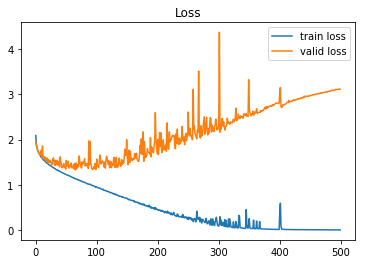

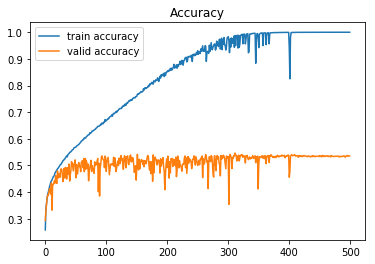

In [10]:
import matplotlib.pyplot as plt
# 以視覺畫方式檢視訓練過程

train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["acc"]
valid_acc = model.history.history["val_acc"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()